In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from imblearn.pipeline import Pipeline
import time
#from sklearn.pipeline import Pipeline

"""#Useless Functions to check stuff in text files#"""

def countLinesTxt(arxeio):
  grammes = 0
  for lines in arxeio:
    if lines != "\n":
      grammes += 1
  return grammes

def countElementsInLine(arxeio):
  
  Lines = arxeio.readlines()  
  
  for grammi in Lines: 
    countL = 0
    for lexi in grammi.split():
      countL +=1
      
  return countL

### Check what's in that dat files

def CheckInTheFile(arxeio):
  
  with open(arxeio,"r+") as f:
    f_grammes = countLinesTxt(f)
    print("The lines of the xa file are :"+str(f_grammes))
    f.close()

  with open(arxeio,"r+") as f:
    f_elements = countElementsInLine(f)
    print("The elements in each line of the "+arxeio+" file are :"+str(f_elements))
    f.close()
  return None

In [2]:
arxeia_lista = ["xaa.dat","xab.dat","xac.dat","xad.dat","xae.dat","xaf.dat","xag.dat","xah.dat","xai.dat"]

#check for 
for i in range(0,len(arxeia_lista)):
  CheckInTheFile(arxeia_lista[i])

The lines of the xa file are :94
The elements in each line of the xaa.dat file are :19
The lines of the xa file are :94
The elements in each line of the xab.dat file are :19
The lines of the xa file are :94
The elements in each line of the xac.dat file are :19
The lines of the xa file are :94
The elements in each line of the xad.dat file are :19
The lines of the xa file are :94
The elements in each line of the xae.dat file are :19
The lines of the xa file are :94
The elements in each line of the xaf.dat file are :19
The lines of the xa file are :94
The elements in each line of the xag.dat file are :19
The lines of the xa file are :94
The elements in each line of the xah.dat file are :19
The lines of the xa file are :94
The elements in each line of the xai.dat file are :19


In [3]:
def FileToLista2D(arxeio):

  with open(arxeio, 'r+') as f:
    str_or_int = countElementsInLine(f)
    #print(str_or_int)
  f.close()

  arxeio_lista_2D = []
  
  with open(arxeio, 'r+') as f:
    
    #read lines of the file
    lines = f.readlines()
  
    for grammi in lines: 
      words = []
      counter = 0
      for lexi in grammi.split():
        counter +=1
        if counter == str_or_int :
          words.append(lexi)
        else: 
          words.append(int(lexi))

      arxeio_lista_2D.append(words)
      
  f.close()

  #print(arxeio_lista_2D[0])
  arxeio_pinakas = np.asarray(arxeio_lista_2D,dtype=object)
  #print(arxeio_pinakas[0])

  return arxeio_pinakas

In [4]:
arxeia_seLista = []
for i in range(0,len(arxeia_lista)):
  arxeia_seLista.append(FileToLista2D(arxeia_lista[i]))

ToArxeio = np.concatenate((arxeia_seLista[0],arxeia_seLista[1],arxeia_seLista[2],
                           arxeia_seLista[3],arxeia_seLista[4],arxeia_seLista[5],
                           arxeia_seLista[6],arxeia_seLista[7],arxeia_seLista[8]),axis=0)

#check if *.dat are concatenated correctly
print(ToArxeio.shape)
print(ToArxeio.shape[0])
print(ToArxeio.shape[1])
print(ToArxeio)


(846, 19)
846
19
[[95 48 83 ... 187 197 'van']
 [91 41 84 ... 189 199 'van']
 [104 50 106 ... 188 196 'saab']
 ...
 [106 54 101 ... 187 201 'saab']
 [86 36 78 ... 190 195 'saab']
 [85 36 66 ... 186 190 'van']]


In [ ]:
""" 
#######################
### Download xa.dat ###
#######################

from google.colab import files

with open("xa.dat","w+") as f:
  
  for grammi in range(0,ToArxeio.shape[0]):
    for stoixeio in ToArxeio[grammi]:
      f.write(str(stoixeio))
      f.write(" ")
    f.write("\n")

f.close()

files.download('xa.dat')

xa_lista2D = FileToLista2D('xa.dat')

print(len(xa_lista2D))
print(len(xa_lista2D[0]))
print(xa_lista2D[0])

xa_array = np.array(xa_lista2D)

print(xa_array.shape)
print(xa_array.shape[0])
print(xa_array.shape[1])
print(xa_array[0])

"""

' \n#######################\n### Download xa.dat ###\n#######################\n\nfrom google.colab import files\n\nwith open("xa.dat","w+") as f:\n  \n  for grammi in range(0,ToArxeio.shape[0]):\n    for stoixeio in ToArxeio[grammi]:\n      f.write(str(stoixeio))\n      f.write(" ")\n    f.write("\n")\n\nf.close()\n\nfiles.download(\'xa.dat\')\n\nxa_lista2D = FileToLista2D(\'xa.dat\')\n\nprint(len(xa_lista2D))\nprint(len(xa_lista2D[0]))\nprint(xa_lista2D[0])\n\nxa_array = np.array(xa_lista2D)\n\nprint(xa_array.shape)\nprint(xa_array.shape[0])\nprint(xa_array.shape[1])\nprint(xa_array[0])\n\n'

In [5]:
RsamplesEqual = ["opel","saab","bus","van"]

def CheckEquality(arxeio_array,onoma_klashs):

  num_in_class = 0
  for i in range(0,arxeio_array.shape[0]):
    if arxeio_array[i][18] == onoma_klashs :
      num_in_class +=1

  return num_in_class

In [6]:

plhthoi_klasewn = []
for onoma in RsamplesEqual:
  plhthoi_klasewn.append(CheckEquality(ToArxeio,onoma))

print("There are "+str(plhthoi_klasewn[0])+" samples of opel")
print("There are "+str(plhthoi_klasewn[1])+" samples of saab")
print("There are "+str(plhthoi_klasewn[2])+" samples of bus")
print("There are "+str(plhthoi_klasewn[3])+" samples of van")
print("The biggest different between classes is : "+str(max(plhthoi_klasewn)/min(plhthoi_klasewn)))


There are 212 samples of opel
There are 217 samples of saab
There are 218 samples of bus
There are 199 samples of van
The biggest different between classes is : 1.0954773869346734


In [7]:
#################################
""" Editing file as DataFrame """
#################################

sthles19=['Compactness','Circularity','Distance Circularity',
          'Radius Ratio','PR. Axis Aspect Ratio','Max Length Aspect Ratio',
          'Scatter Ratio','Elongatedness','Pr. Axis Rectangularity',
          'Max Length Rectangularity', 'Scaled Variance Along Major Axis',
          'Scaled Variance Along Minor Axis','Scaled Radius of Gyration',
          'Skewness abour Major Axis','Skewness abour Miinor Axis',
          'Kurtosis about 4 Minor Axis','Kurtosis about 4 Major Axis',
          'Hollows Ratio','Classes']

df = pd.DataFrame(ToArxeio,columns=sthles19)
for i in range(18):
  df[sthles19[i]]=df[sthles19[i]].apply(int)
df[sthles19[18]]=df[sthles19[18]].apply(str)


In [8]:
# checking in the dataframe 
print("The infos for the vehicles dataframe \n")
print(df.info())
print("\nAre there any zeros or missing values? \n")
print(df.isnull().sum())
print("\nDifferent metrics from dataset \n")
print(df.describe())
print("\nReverse different metrics from dataset \n")
print(df.describe().T)

The infos for the vehicles dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Compactness                       846 non-null    int64 
 1   Circularity                       846 non-null    int64 
 2   Distance Circularity              846 non-null    int64 
 3   Radius Ratio                      846 non-null    int64 
 4   PR. Axis Aspect Ratio             846 non-null    int64 
 5   Max Length Aspect Ratio           846 non-null    int64 
 6   Scatter Ratio                     846 non-null    int64 
 7   Elongatedness                     846 non-null    int64 
 8   Pr. Axis Rectangularity           846 non-null    int64 
 9   Max Length Rectangularity         846 non-null    int64 
 10  Scaled Variance Along Major Axis  846 non-null    int64 
 11  Scaled Variance Along Minor Axis  846 non-nul

In [9]:
def sns_distribution(plotter,titlos):
  sns.set_style('darkgrid')
  plt.figure(figsize = (8,6))
  plt.title(titlos)
  sns.countplot(plotter, palette = 'magma')
  plt.show()
  return None



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


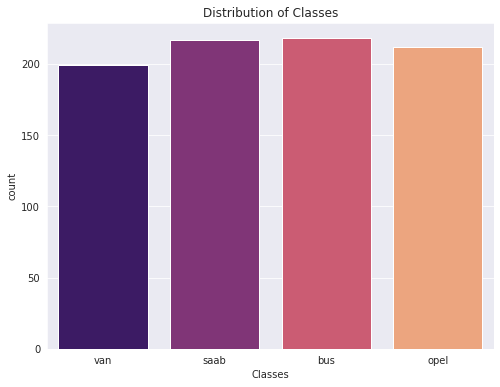

In [ ]:
sns_distribution(df['Classes'],"Distribution of Classes")

In [10]:
###########################
### split file into X y ###
###########################

#make X : numpy
X = np.zeros((ToArxeio.shape[0],ToArxeio.shape[1]-1))
#make y : list -> numpy 
y_lista = []

for i in range(0,ToArxeio.shape[0]):
  X[i]=ToArxeio[i][:18]
  y_lista.append(ToArxeio[i][18])

y = np.array(y_lista)


#print(X.shape)
#print(X[0])
#print(y.shape)
#print(y[0])


In [11]:
# split dataset into 70-30 with shuffle parameter enabled so that we can reduce the variance in both test and train set and in order to ensure
# that the sets are representative of the overall distribution and reduce the overfitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

#Checki if OK ?
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(592, 18)
(592,)
(254, 18)
(254,)


The X train file is splitted like this 
There are 139 samples of opel in the train
There are 154 samples of saab in the train
There are 160 samples of bus in the train
There are 139 samples of van in the train
The biggest different between classes in X train is : 1.1510791366906474
 
The X test file is splitted like this 
There are 73 samples of opel in the test
There are 63 samples of saab in the test
There are 58 samples of bus in the test
There are 60 samples of van in the test
The biggest different between classes in X test is : 1.2586206896551724


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


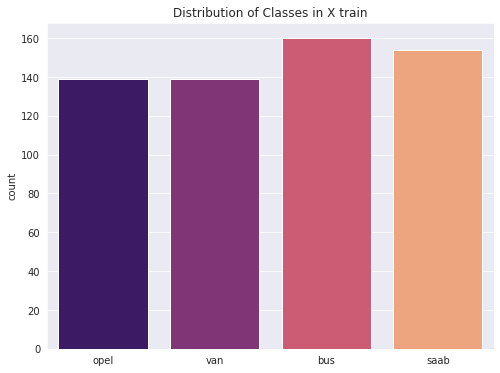

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


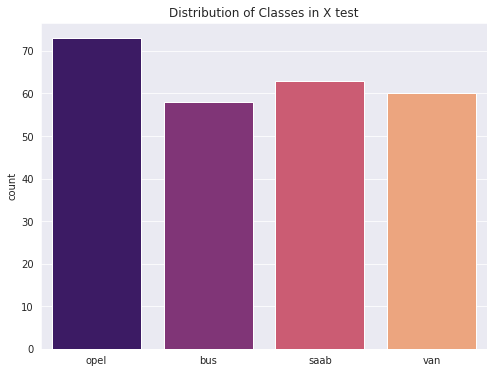

In [12]:
###################################
### check if splitting was fair ###
###################################

def CheckEqualityInSplitted(X_split, y_split, onoma_klashs):

  num_in_class = 0
  for i in range(0,X_split.shape[0]):
    if y_split[i] == onoma_klashs :
      num_in_class +=1

  return num_in_class

##### check the X train #####

plhthoi_klasewn_Xtr = []
for onoma in RsamplesEqual:
  plhthoi_klasewn_Xtr.append(CheckEqualityInSplitted(X_train,y_train,onoma))

print("The X train file is splitted like this ")
print("There are "+str(plhthoi_klasewn_Xtr[0])+" samples of opel in the train")
print("There are "+str(plhthoi_klasewn_Xtr[1])+" samples of saab in the train")
print("There are "+str(plhthoi_klasewn_Xtr[2])+" samples of bus in the train")
print("There are "+str(plhthoi_klasewn_Xtr[3])+" samples of van in the train")
print("The biggest different between classes in X train is : "+str(max(plhthoi_klasewn_Xtr)/min(plhthoi_klasewn_Xtr)))
print(" ")

##### check the X test #####

plhthoi_klasewn_Xte = []
for onoma in RsamplesEqual:
  plhthoi_klasewn_Xte.append(CheckEqualityInSplitted(X_test,y_test,onoma))

print("The X test file is splitted like this ")
print("There are "+str(plhthoi_klasewn_Xte[0])+" samples of opel in the test")
print("There are "+str(plhthoi_klasewn_Xte[1])+" samples of saab in the test")
print("There are "+str(plhthoi_klasewn_Xte[2])+" samples of bus in the test")
print("There are "+str(plhthoi_klasewn_Xte[3])+" samples of van in the test")
print("The biggest different between classes in X test is : "+str(max(plhthoi_klasewn_Xte)/min(plhthoi_klasewn_Xte)))

#Visualize X_train splitted X_test splitted
sns_distribution(y_train,"Distribution of Classes in X train")
sns_distribution(y_test,"Distribution of Classes in X test")


In [18]:
############################################
### simple accuracy testing: alternative ###
### implementation of the accuracy_score ### 
### from sklearn.metrics  combined with  ###
### fit-training of the model            ###
############################################

def SimpleAccuracy(taxinomitis, Xi_tr, yi_tr, Xi_te, yi_te, epilogeas):
  #declare classifiers
  clf = taxinomitis
  
  #take the train time
  start_time1 = time.time()
  _ = clf.fit(Xi_tr, yi_tr)
  train_time = time.time() - start_time1

  #take the test time 
  start_time2 = time.time()
  yi_predi = clf.predict(Xi_te)
  test_time = time.time() - start_time2

  if epilogeas == 'aplo' :
    score = clf.score(Xi_te, yi_te)
  if epilogeas == 'accu' :
    score = metrics.accuracy_score(yi_te, yi_predi)
  if epilogeas == 'Fena' :
    score = metrics.f1_score(yi_te, yi_predi,average='macro')
  
  return clf, score, train_time, test_time

In [16]:
###################################################################################
""" While using LR classifier with default parameters we run into this warning :
 
    ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
      https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
      https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG, 
    
    So because it hurts are eyes to see warnings we ignored them 
    to test the classifier with default parameters
    """
####################################################################################
import warnings 
warnings.filterwarnings('ignore')


The accuracy score for dummy classifier with simple score is : 0.2283464566929134
The accuracy score for dummy classifier with accuracy is : 0.2283464566929134
The accuracy score for dummy classifier with f1 macro is : 0.09294871794871795
 
The accuracy score for Gaussian Naive Bayesian classifier with simple score is : 0.44881889763779526
The accuracy score for Gaussian Naive Bayesian classifier with accuracy is : 0.44881889763779526
The accuracy score for Gaussian Naive Bayesian classifier with f1 macro is : 0.39432766367137356
 
The accuracy score for LogisticRegression classifier with simple score is : 0.7086614173228346
The accuracy score for LogisticRegression classifier with accuracy is : 0.7086614173228346
The accuracy score for LogisticRegression classifier with f1 macro is : 0.711385993602241
 
The accuracy score for KNeighborsClassifier classifier with simple score is : 0.6456692913385826
The accuracy score for KNeighborsClassifier classifier with accuracy is : 0.64566929133

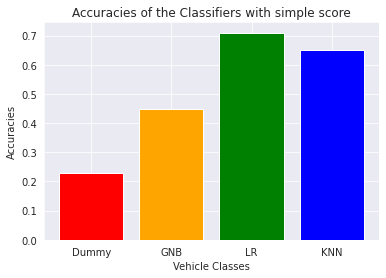

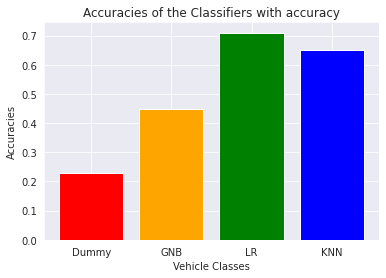

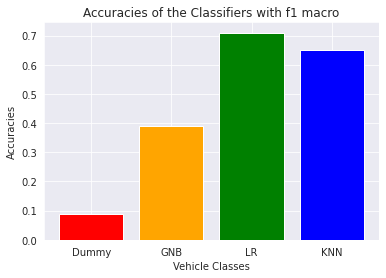

In [19]:
""" Let's check the classifiers accuracy with a simple training """

### Dummy Classifier ###
from sklearn.dummy import DummyClassifier
dummy_simple, dummy_simple_score, dc_train_time, dc_test_time = SimpleAccuracy(DummyClassifier(), X_train, y_train, X_test, y_test,'aplo')
dummy_accur_score = SimpleAccuracy(DummyClassifier(), X_train, y_train, X_test, y_test, 'accu')[1]
dummy_f1_score = SimpleAccuracy(DummyClassifier(), X_train, y_train, X_test, y_test, 'Fena')[1]
print("The accuracy score for dummy classifier with simple score is : "+str(dummy_simple_score))
print("The accuracy score for dummy classifier with accuracy is : "+str(dummy_accur_score))
print("The accuracy score for dummy classifier with f1 macro is : "+str(dummy_f1_score))
print(" ")

### Gaussian Naive Bayesian-training(fit) of the model, δηλαδή υπολογισμός μέσης τιμής 
##και διακύμανσης για τα χαρακτηριστικά και κλάσεις ###
from sklearn.naive_bayes import GaussianNB
gnb_simple, gnb_simple_score, gnb_train_time, gnb_test_time = SimpleAccuracy(GaussianNB(), X_train, y_train, X_test, y_test,'aplo') 
gnb_accur_score = SimpleAccuracy(GaussianNB(), X_train, y_train, X_test, y_test,'accu')[1]
gnb_f1_score = SimpleAccuracy(GaussianNB(), X_train, y_train, X_test, y_test,'Fena')[1]
print("The accuracy score for Gaussian Naive Bayesian classifier with simple score is : "+str(gnb_simple_score))
print("The accuracy score for Gaussian Naive Bayesian classifier with accuracy is : "+str(gnb_accur_score))
print("The accuracy score for Gaussian Naive Bayesian classifier with f1 macro is : "+str(gnb_f1_score))
print(" ")

### Logistic Regression ###
from sklearn.linear_model import LogisticRegression
lr_simple, lr_simple_score, lr_train_time, lr_test_time = SimpleAccuracy(LogisticRegression(), X_train, y_train, X_test, y_test,'aplo') 
lr_accur_score = SimpleAccuracy(LogisticRegression(), X_train, y_train, X_test, y_test,'accu')[1]
lr_f1_score = SimpleAccuracy(LogisticRegression(), X_train, y_train, X_test, y_test,'Fena') [1]
print("The accuracy score for LogisticRegression classifier with simple score is : "+str(lr_simple_score))
print("The accuracy score for LogisticRegression classifier with accuracy is : "+str(lr_accur_score))
print("The accuracy score for LogisticRegression classifier with f1 macro is : "+str(lr_f1_score))
print(" ")

### KNN Classifier ###
#edv den pr;epei na dokimasoyme diafora k san orismata tou kNN??? 
from sklearn.neighbors import KNeighborsClassifier
knn_simple, knn_simple_score,knn_train_time, knn_test_time = SimpleAccuracy(KNeighborsClassifier(), X_train, y_train, X_test, y_test,'aplo')
knn_accur_score = SimpleAccuracy(KNeighborsClassifier(), X_train, y_train, X_test, y_test,'accu')[1]
knn_f1_score = SimpleAccuracy(KNeighborsClassifier(), X_train, y_train, X_test, y_test,'Fena')[1]
print("The accuracy score for KNeighborsClassifier classifier with simple score is : "+str(knn_simple_score))
print("The accuracy score for KNeighborsClassifier classifier with accuracy is : "+str(knn_accur_score))
print("The accuracy score for KNeighborsClassifier classifier with f1 macro is : "+str(knn_f1_score))
print(" ")

### Let's put all the clfs and scores into lists ###
clfs4_simple = [dummy_simple, gnb_simple, lr_simple, knn_simple]
clfs4_simple_scores = [dummy_simple_score, gnb_simple_score, lr_simple_score, knn_simple_score]
clfs4_accur_scores = [dummy_accur_score, gnb_accur_score, lr_accur_score, knn_accur_score]
clfs4_f1_scores = [dummy_f1_score, gnb_f1_score, lr_f1_score, knn_f1_score]

clfs4_train_time = [dc_train_time, gnb_train_time, lr_train_time, knn_train_time]
clfs4_test_time = [dc_test_time, gnb_test_time, lr_test_time, knn_test_time]

#Visualize the accuracy scores 
css_2f_simple = []
css_2f_accur = []
css_2f_f1 = []
for i in range(0,len(clfs4_simple_scores)):
  css_2f_simple.append(round(clfs4_simple_scores[i], 2))
  css_2f_accur.append(round(clfs4_accur_scores[i], 2))
  css_2f_f1.append(round(clfs4_f1_scores[i], 2))

def baraDefault(Clasif, epidosi):
  clfs4_names = ["Dummy","GNB","LR","KNN"]
  polichromo4 = ['red','orange','green','blue']
  plt.bar(clfs4_names, Clasif,color=polichromo4)
  plt.xlabel("Vehicle Classes")
  plt.ylabel("Accuracies")
  plt.title("Accuracies of the Classifiers with "+epidosi)
  plt.show()
  print("\n")
  return None

baraDefault(css_2f_simple, "simple score")
baraDefault(css_2f_accur, "accuracy")
baraDefault(css_2f_f1, "f1 macro")
 

In [27]:
################################
### 10 fold cross validation ###
### with accuracy || f1macro ###
################################

def evaluate_10F(clf, Xi, yi, folds, eidos_accuracy):

  start_time = time.time()
  scores_fcv = cross_val_score(clf, Xi, yi,
                               cv=KFold(n_splits=folds, random_state=32, shuffle=True),
                               scoring=eidos_accuracy)

  stop_time = time.time() - start_time 
  print("The scores on each of the "+str(folds)+" splits with "+eidos_accuracy+" for "+str(clf),scores_fcv)
    
  mean_scores_fcv = np.mean(scores_fcv)
  print("The mean score with "+eidos_accuracy+" for "+str(clf)+" is "+str(mean_scores_fcv)+"\n")
    
  return mean_scores_fcv,stop_time


In [28]:

classifiers4 = [DummyClassifier(),GaussianNB(),LogisticRegression(),KNeighborsClassifier()]

clfs4_10F_accuracy = []
clfs4_10F_f1macro = []
clfs4_10F_accur_times = []
clfs4_10F_f1_times = []
for taxinomi in classifiers4:
  clfs4_10F_accuracy.append(evaluate_10F(taxinomi, X, y, 10, "accuracy")[0])
  clfs4_10F_accur_times.append(evaluate_10F(taxinomi, X, y, 10, "accuracy")[1])
  clfs4_10F_f1macro.append(evaluate_10F(taxinomi, X, y, 10, "f1_macro")[0])
  clfs4_10F_f1_times.append(evaluate_10F(taxinomi, X, y, 10, "f1_macro")[1])


The scores on each of the 10 splits with accuracy for DummyClassifier() [0.28235294 0.22352941 0.16470588 0.22352941 0.17647059 0.28235294
 0.25       0.20238095 0.1547619  0.21428571]
The mean score with accuracy for DummyClassifier() is 0.217436974789916

The scores on each of the 10 splits with accuracy for DummyClassifier() [0.28235294 0.22352941 0.16470588 0.22352941 0.17647059 0.28235294
 0.25       0.20238095 0.1547619  0.21428571]
The mean score with accuracy for DummyClassifier() is 0.217436974789916

The scores on each of the 10 splits with f1_macro for DummyClassifier() [0.11009174 0.09134615 0.07070707 0.09134615 0.075      0.11009174
 0.1        0.08415842 0.06701031 0.08823529]
The mean score with f1_macro for DummyClassifier() is 0.08879868838754923

The scores on each of the 10 splits with f1_macro for DummyClassifier() [0.11009174 0.09134615 0.07070707 0.09134615 0.075      0.11009174
 0.1        0.08415842 0.06701031 0.08823529]
The mean score with f1_macro for DummyC

In [22]:
################
### PLOT BAR ###
################

def plot_bares(pinakas, onomaTA, eidos_accur):
  plt.bar(onomaTA , pinakas)
  plt.xlabel("Estimators used")
  plt.ylabel("scores using scoring : "+eidos_accur)
  plt.title("Vehicle Distribution with "+eidos_accur)
  plt.show()
  print('\n')
  return None


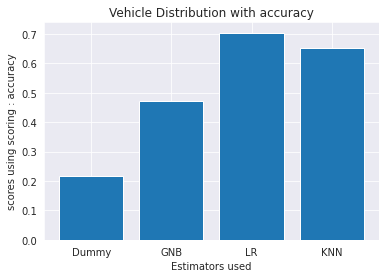

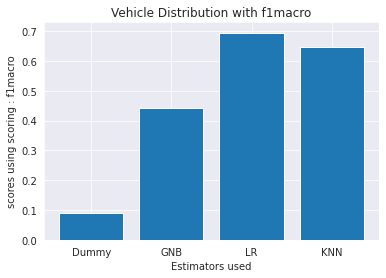

In [23]:
clfs4_10F_accuracy = np.asarray(clfs4_10F_accuracy) 
clfs4_10F_f1macro = np.asarray(clfs4_10F_f1macro)
clfs4_names = ["Dummy","GNB","LR","KNN"]

plot_bares(clfs4_10F_accuracy, clfs4_names, "accuracy")
plot_bares(clfs4_10F_f1macro, clfs4_names, "f1macro")


In [24]:
def plot_AccurANDf1(bara_1, bara_2, onomata, Leganda, titlos):
  x_len = np.arange(len(onomata))
  w_bar = 0.36
  plt.bar(x_len-(w_bar/2), bara_1, width = w_bar)
  plt.bar(x_len+(w_bar/2), bara_2, width = w_bar)
  #plt.xlabel("Estimators used")
  plt.xticks(x_len, labels = onomata)
  plt.ylabel("Scores of Classifiers ")
  plt.legend(Leganda,loc='best')
  plt.title(titlos)
  plt.show()
  return None

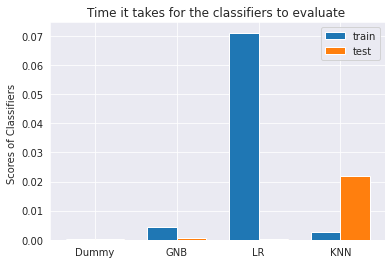

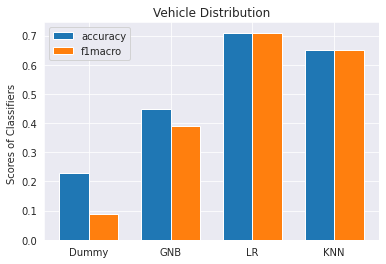

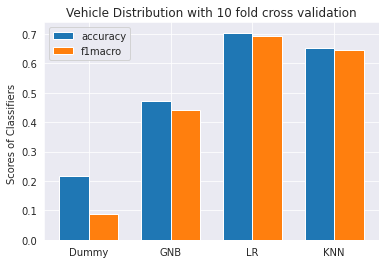

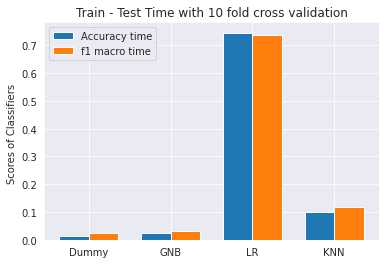

In [33]:
plot_AccurANDf1(clfs4_train_time, clfs4_test_time, clfs4_names, ['train','test'],"Time it takes for the classifiers to evaluate ")
plot_AccurANDf1(css_2f_accur, css_2f_f1, clfs4_names, ['accuracy','f1macro'],"Vehicle Distribution")
plot_AccurANDf1(clfs4_10F_accuracy, clfs4_10F_f1macro, clfs4_names,['accuracy','f1macro'],"Vehicle Distribution with 10 fold cross validation")
plot_AccurANDf1(clfs4_10F_accur_times, clfs4_10F_f1_times,clfs4_names,['Accuracy time','f1 macro time'],"Train - Test Time with 10 fold cross validation")

In [30]:
"""
    markdown tables 
    def from the stack overflow 
    https://stackoverflow.com/questions/13394140/generate-markdown-tables

"""

# Translation dictionaries for table alignment
left_rule = {'<': ':', '^': ':', '>': '-'}
right_rule = {'<': '-', '^': ':', '>': ':'}

def evalute_field(record, field_spec):
    """
    Evalute a field of a record using the type of the field_spec as a guide.
    """
    if type(field_spec) is int:
        return str(record[field_spec])
    elif type(field_spec) is str:
        return str(getattr(record, field_spec))
    else:
        return str(field_spec(record))

def table(file, records, fields, headings, alignment = None):
    num_columns = len(fields)
    assert len(headings) == num_columns

    # Compute the table cell data
    columns = [[] for i in range(num_columns)]
    for record in records:
        for i, field in enumerate(fields):
            columns[i].append(evalute_field(record, field))

    # Fill out any missing alignment characters.
    extended_align = alignment if alignment != None else []
    if len(extended_align) > num_columns:
        extended_align = extended_align[0:num_columns]
    elif len(extended_align) < num_columns:
        extended_align += [('^', '<')
                           for i in range[num_columns-len(extended_align)]]

    heading_align, cell_align = [x for x in zip(*extended_align)]

    field_widths = [len(max(column, key=len)) if len(column) > 0 else 0
                    for column in columns]
    heading_widths = [max(len(head), 2) for head in headings]
    column_widths = [max(x) for x in zip(field_widths, heading_widths)]

    _ = ' | '.join(['{:' + a + str(w) + '}'
                    for a, w in zip(heading_align, column_widths)])
    heading_template = '| ' + _ + ' |'
    _ = ' | '.join(['{:' + a + str(w) + '}'
                    for a, w in zip(cell_align, column_widths)])
    row_template = '| ' + _ + ' |'

    _ = ' | '.join([left_rule[a] + '-'*(w-2) + right_rule[a]
                    for a, w in zip(cell_align, column_widths)])
    ruling = '| ' + _ + ' |'

    file.write(heading_template.format(*headings).rstrip() + '\n')
    file.write(ruling.rstrip() + '\n')
    for row in zip(*columns):
        file.write(row_template.format(*row).rstrip() + '\n')

    return None 

def markdownCreator(titlos,epikefalides,dedomena):
  
  sys.stdout.write(titlos+'\n\n')

  fields = np.ndarray.tolist(np.arange(len(epikefalides)))

  align = [('^', '<'), ('^', '^'), ('^', '<'), ('^', '^'), ('^', '>'),('^','^')]

  table(sys.stdout, dedomena, fields, epikefalides, align)

  return None

In [31]:
titlos_mark1 = 'The accuracies for the classifiers with default parameters and 10 fold cross validation' 
epikefalides_mark1 = ['Classifiers', 'Dummy', 'Gaussian NB', 'Logistic Regresion', 'KNN']
dedomena_mark1 = [('Simple Accuracy',str(clfs4_simple_scores[0]),str(clfs4_simple_scores[1]),str(clfs4_simple_scores[2]),str(clfs4_simple_scores[3])),
                  ('Accuracy 10 fcv', str(clfs4_10F_accuracy[0]), str(clfs4_10F_accuracy[1]), str(clfs4_10F_accuracy[2]), str(clfs4_10F_accuracy[3])),
                  ('Accuracy Time', str(clfs4_10F_accur_times[0]),str(clfs4_10F_accur_times[1]),str(clfs4_10F_accur_times[2]),str(clfs4_10F_accur_times[3])),
                  ('f1 macro 10 fcv', str(clfs4_10F_f1macro[0]), str(clfs4_10F_f1macro[1]), str(clfs4_10F_f1macro[2]), str(clfs4_10F_f1macro[3])),
                  ('f1 macro Time', str(clfs4_10F_f1_times[0]),str(clfs4_10F_f1_times[1]),str(clfs4_10F_f1_times[2]),str(clfs4_10F_f1_times[3]))]
                  
markdownCreator(titlos_mark1, epikefalides_mark1, dedomena_mark1)

The accuracies for the classifiers with default parameters and 10 fold cross validation

|   Classifiers   |        Dummy         |     Gaussian NB     | Logistic Regresion |         KNN         |
| :-------------- | :------------------: | :------------------ | :----------------: | ------------------: |
| Simple Accuracy |  0.2283464566929134  | 0.44881889763779526 | 0.7086614173228346 |  0.6456692913385826 |
| Accuracy 10 fcv |  0.217436974789916   | 0.4704341736694678  | 0.7043837535014005 |  0.6525210084033614 |
| Accuracy Time   | 0.012924671173095703 | 0.02456951141357422 | 0.7453916072845459 | 0.10055255889892578 |
| f1 macro 10 fcv | 0.08879868838754923  | 0.4413071991576848  | 0.6946675267581724 |  0.6464304560744696 |
| f1 macro Time   | 0.02449631690979004  | 0.03313159942626953 | 0.7372086048126221 |  0.1188819408416748 |


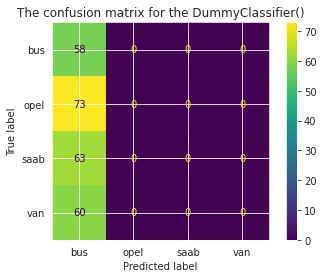

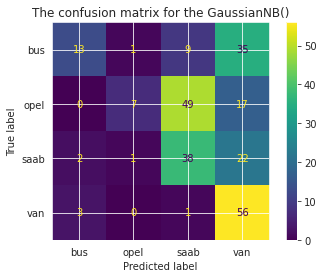

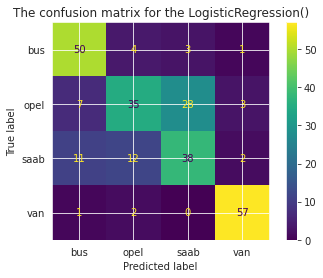

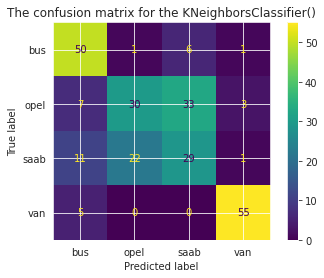

In [34]:
###########################
### confusion matrixies ###
###########################

for clasi in clfs4_simple:
  #plt.figure(figsize = (9,9))
  plot_confusion_matrix(clasi, X_test, y_test) 
  plt.title("The confusion matrix for the "+str(clasi))
  plt.show()
  


In [35]:
## def to plot oprimization 

def plot_bares_No2(scores_before, scores_after, deikths, oClasif):
  plotdata = pd.DataFrame({"default "+oClasif+" Classifier":np.array([scores_before[deikths],scores_before[deikths]]),
                           "optimized "+oClasif+" Classifier":np.array([scores_after[deikths],scores_after[deikths]])},
                           index=('accuracy_score','f1_score'))
  
  plotdata.plot(kind="bar",figsize=(7, 7))
  plt.title("The "+oClasif+" classifier before and after optimization")
  plt.xlabel("metrics")
  plt.ylabel("scores")
  plt.legend(loc='best')
  plt.show()
  return None

In [36]:
#########################
""" Pipeline Creation """
#########################

#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# classes for preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# declare transformers as default
selector = VarianceThreshold()
standar = StandardScaler()
minmax = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()


In [43]:
def Proc_Pipe_gsCV(PiPe,Parameters,Folds,ToScor):
  
  modelo = GridSearchCV(estimator=PiPe,param_grid=Parameters, cv=Folds, scoring=ToScor,n_jobs=-1)
  modelo.fit(X_train,y_train)
  modelo.predict(X_test)
  #print("The best estimator is",modelo.best_estimator_)
  print("The best parameters are ",modelo.best_params_)
  
  best_estim = modelo.best_estimator_
  best_score = modelo.best_score_
    
  return best_estim, best_score

In [38]:
def standarORminmax(stan, stan_NoPca, miniMegalo, miniMegalo_NoPca, clasif):
  checker = max(stan, stan_NoPca, miniMegalo, miniMegalo_NoPca)
  if stan == checker :
    best_normal = stan
    print("Standard > MinMax with PCA for "+clasif)
  if stan_NoPca == checker :
    best_normal = stan_NoPca
    print("Standard > MinMax without PCA for "+clasif)
  if miniMegalo == checker :
    best_normal = miniMegalo
    print("Standard < MinMax with PCA for "+clasif)
  if miniMegalo_NoPca == checker :
    best_normal = miniMegalo_NoPca
    print("Standard < MinMax without PCA for "+clasif)
  
  return best_normal

In [46]:
def PoiosEinaiObest(Estim_Accur):
  best_accur = max(Estim_Accur[0][1],Estim_Accur[1][1],Estim_Accur[2][1],Estim_Accur[3][1],
                   Estim_Accur[4][1],Estim_Accur[5][1],Estim_Accur[6][1],Estim_Accur[7][1])

  if(Estim_Accur[0][1]==best_accur):
    oBest = Estim_Accur[0][0]
  if(Estim_Accur[1][1]==best_accur):
    oBest = Estim_Accur[1][0]
  if(Estim_Accur[2][1]==best_accur):
    oBest = Estim_Accur[2][0]
  if(Estim_Accur[3][1]==best_accur):
    oBest = Estim_Accur[3][0]
  if(Estim_Accur[4][1]==best_accur):
    oBest = Estim_Accur[4][0]
  if(Estim_Accur[5][1]==best_accur):
    oBest = Estim_Accur[5][0]
  if(Estim_Accur[6][1]==best_accur):
    oBest = Estim_Accur[6][0]
  if(Estim_Accur[7][1]==best_accur):
    oBest = Estim_Accur[7][0]

  return oBest

In [44]:
##########################
""" Dummy Optimization """
##########################

pipe_dc_ss = Pipeline([('selector',selector),('scaler',standar),('pca',pca),('Dummy',DummyClassifier())],memory='tmp')
pipe_dc_mm = Pipeline([('selector',selector),('scaler',minmax),('pca',pca),('Dummy',DummyClassifier())],memory='tmp')

vthreshold_dc = [0,20,40,60,100] 
n_components_dc = [2,3,5]
params_dc = {'selector__threshold':vthreshold_dc,'pca__n_components':n_components_dc ,
             'Dummy__strategy':('stratified' , 'most_frequent' ,'prior', 'uniform', 'constant'),
             'Dummy__constant':('bus','opel','saab','van')}

Dummy_optim_accur_ss, dc_optim_accur_ss = Proc_Pipe_gsCV(pipe_dc_ss, params_dc, 10,'accuracy')
print("The best score for Dummy with optimization in accuracy with standar scalar is : "+str(dc_optim_accur_ss)+"\n")

Dummy_optim_accur_mm, dc_optim_accur_mm = Proc_Pipe_gsCV(pipe_dc_mm, params_dc, 10,'accuracy')
print("The best score for Dummy with optimization in accuracy with minmax scalar is : "+str(dc_optim_accur_mm)+"\n")

Dummy_optim_f1_ss, dc_optim_f1_ss = Proc_Pipe_gsCV(pipe_dc_ss, params_dc, 10, 'f1_macro')
print("The best score for Dummy with optimization in f1 macro with standar scalar is : "+str(dc_optim_f1_ss)+"\n")

Dummy_optim_f1_mm, dc_optim_f1_mm = Proc_Pipe_gsCV(pipe_dc_mm, params_dc, 10, 'f1_macro')
print("The best score for Dummy with optimization in f1 macro with minmax scalar is : "+str(dc_optim_f1_mm)+"\n")


The best parameters are  {'Dummy__constant': 'saab', 'Dummy__strategy': 'uniform', 'pca__n_components': 5, 'selector__threshold': 100}
The best score for Dummy with optimization in accuracy with standar scalar is : 0.2990677966101695

The best parameters are  {'Dummy__constant': 'van', 'Dummy__strategy': 'stratified', 'pca__n_components': 2, 'selector__threshold': 40}
The best score for Dummy with optimization in accuracy with minmax scalar is : 0.29372881355932207

The best parameters are  {'Dummy__constant': 'van', 'Dummy__strategy': 'stratified', 'pca__n_components': 5, 'selector__threshold': 40}
The best score for Dummy with optimization in f1 macro with standar scalar is : 0.2927575929979015

The best parameters are  {'Dummy__constant': 'bus', 'Dummy__strategy': 'stratified', 'pca__n_components': 2, 'selector__threshold': 60}
The best score for Dummy with optimization in f1 macro with minmax scalar is : 0.2855119646715166



In [47]:
###########################
### Testing without PCA ###
###########################

pipe_dc_ss_NoPCA = Pipeline([('selector',selector),('scaler',standar),('Dummy',DummyClassifier())],memory='tmp')
pipe_dc_mm_NoPCA = Pipeline([('selector',selector),('scaler',minmax),('Dummy',DummyClassifier())],memory='tmp')

vthreshold_dc = [0,20,40,60,100] 
n_components_dc = [2,3,5]
params_dc_NoPCA = {'selector__threshold':vthreshold_dc,
                    'Dummy__strategy':('stratified' , 'most_frequent' ,'prior', 'uniform', 'constant'),
                    'Dummy__constant':('bus','opel','saab','van')}

Dummy_optim_accur_ss_NoPCA, dc_optim_accur_ss_NoPCA = Proc_Pipe_gsCV(pipe_dc_ss_NoPCA, params_dc_NoPCA, 10,'accuracy')
print("The best score for Dummy with optimization in accuracy with standar scalar is : "+str(dc_optim_accur_ss_NoPCA)+"\n")

Dummy_optim_accur_mm_NoPCA, dc_optim_accur_mm_NoPCA = Proc_Pipe_gsCV(pipe_dc_mm_NoPCA, params_dc_NoPCA, 10,'accuracy')
print("The best score for Dummy with optimization in accuracy with minmax scalar is : "+str(dc_optim_accur_mm_NoPCA)+"\n")

Dummy_optim_f1_ss_NoPCA, dc_optim_f1_ss_NoPCA = Proc_Pipe_gsCV(pipe_dc_ss_NoPCA, params_dc_NoPCA, 10, 'f1_macro')
print("The best score for Dummy with optimization in f1 macro with standar scalar is : "+str(dc_optim_f1_ss_NoPCA)+"\n")

Dummy_optim_f1_mm_NoPCA, dc_optim_f1_mm_NoPCA = Proc_Pipe_gsCV(pipe_dc_mm_NoPCA, params_dc_NoPCA, 10, 'f1_macro')
print("The best score for Dummy with optimization in f1 macro with minmax scalar is : "+str(dc_optim_f1_mm_NoPCA)+"\n")


The best parameters are  {'Dummy__constant': 'van', 'Dummy__strategy': 'uniform', 'selector__threshold': 60}
The best score for Dummy with optimization in accuracy with standar scalar is : 0.2838700564971751

The best parameters are  {'Dummy__constant': 'van', 'Dummy__strategy': 'stratified', 'selector__threshold': 100}
The best score for Dummy with optimization in accuracy with minmax scalar is : 0.2871468926553672

The best parameters are  {'Dummy__constant': 'van', 'Dummy__strategy': 'uniform', 'selector__threshold': 20}
The best score for Dummy with optimization in f1 macro with standar scalar is : 0.2899602282135284

The best parameters are  {'Dummy__constant': 'opel', 'Dummy__strategy': 'stratified', 'selector__threshold': 20}
The best score for Dummy with optimization in f1 macro with minmax scalar is : 0.29696364720164076



Standard > MinMax with PCA for Dummy with accuracy
Standard > MinMax without PCA for Dummy with f1 macro


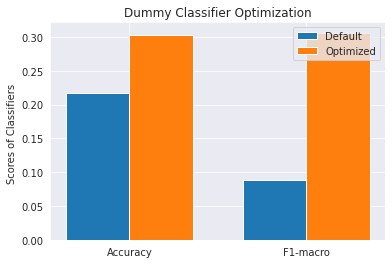

In [42]:
#visualize the results of Dummy optimization
dc_optim_accur = standarORminmax(dc_optim_accur_ss,dc_optim_accur_ss_NoPCA,dc_optim_accur_mm,dc_optim_accur_mm_NoPCA,"Dummy with accuracy")
dc_optim_f1 = standarORminmax(dc_optim_f1_ss,dc_optim_f1_ss_NoPCA,dc_optim_f1_mm,dc_optim_f1_mm_NoPCA,"Dummy with f1 macro")

plot_AccurANDf1([clfs4_10F_accuracy[0],clfs4_10F_f1macro[0]], [dc_optim_accur,dc_optim_f1], 
                ['Accuracy','F1-macro'],['Default','Optimized'] ,"Dummy Classifier Optimization")

The best estimator for the Dummy is Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=100)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('Dummy',
                 DummyClassifier(constant='saab', strategy='uniform'))])


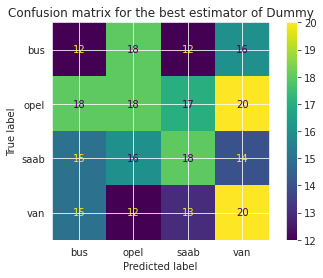

In [53]:
## plot the confusion matrix
## of the best version of Dummy
best_Dummy = PoiosEinaiObest([[Dummy_optim_accur_ss, dc_optim_accur_ss],
                            [Dummy_optim_accur_mm, dc_optim_accur_mm],
                            [Dummy_optim_f1_ss, dc_optim_f1_ss],
                            [Dummy_optim_f1_mm, dc_optim_f1_mm],
                            [Dummy_optim_accur_ss_NoPCA, dc_optim_accur_ss_NoPCA],
                            [Dummy_optim_accur_mm_NoPCA, dc_optim_accur_mm_NoPCA],
                            [Dummy_optim_f1_ss_NoPCA, dc_optim_f1_ss_NoPCA],
                            [Dummy_optim_f1_mm_NoPCA, dc_optim_f1_mm_NoPCA]])

print("The best estimator for the Dummy is",best_Dummy)

plot_confusion_matrix(best_Dummy,X_test, y_test)
plt.title("Confusion matrix for the best estimator of Dummy")
plt.show()

In [54]:
#############################
""" Gaussian Optimization """
#############################

klaseis, numbers_in_klaseis = np.unique(y_train, return_counts=True)

aprioris = []
for i in range(0,len(klaseis)):
  logos = numbers_in_klaseis[i]/len(y_train)
  #logos = round(logos,2)
  aprioris.append(logos)

aprioris = np.asarray(aprioris)

pipe_gnb_ss = Pipeline([('selector',selector),('scaler',standar),('pca',pca),('GNB',GaussianNB(priors=aprioris))],memory='tmp')
pipe_gnb_mm = Pipeline([('selector',selector),('scaler',minmax),('pca',pca),('GNB',GaussianNB(priors=aprioris))],memory='tmp')

vthreshold_gnb = [0,20,40,60,100]  
n_components_gnb = [ 2, 3, 5]
params_gnb = {'selector__threshold':vthreshold_gnb,'pca__n_components':n_components_gnb }

Gaus_optim_accur_ss, gnb_optim_accur_ss = Proc_Pipe_gsCV(pipe_gnb_ss, params_gnb, 10, 'accuracy')
print("The best score for Gaussian with optimization in accuracy with standar scalar is : "+str(gnb_optim_accur_ss)+"\n")

Gaus_optim_accur_mm, gnb_optim_accur_mm = Proc_Pipe_gsCV(pipe_gnb_mm, params_gnb, 10, 'accuracy')
print("The best score for Gaussian with optimization in accuracy with minmax scalar is : "+str(gnb_optim_accur_mm)+"\n")

Gaus_optim_f1_ss, gnb_optim_f1_ss = Proc_Pipe_gsCV(pipe_gnb_ss, params_gnb, 10,'f1_macro')
print("The best score for Gaussian with optimization in f1 macro with standar scalar is : "+str(gnb_optim_f1_ss)+"\n")

Gaus_optim_f1_mm, gnb_optim_f1_mm = Proc_Pipe_gsCV(pipe_gnb_mm, params_gnb, 10,'f1_macro')
print("The best score for Gaussian with optimization in f1 macro with minmax scalar is : "+str(gnb_optim_f1_mm)+"\n")

The best parameters are  {'pca__n_components': 5, 'selector__threshold': 100}
The best score for Gaussian with optimization in accuracy with standar scalar is : 0.5966666666666667

The best parameters are  {'pca__n_components': 5, 'selector__threshold': 60}
The best score for Gaussian with optimization in accuracy with minmax scalar is : 0.5861016949152542

The best parameters are  {'pca__n_components': 5, 'selector__threshold': 100}
The best score for Gaussian with optimization in f1 macro with standar scalar is : 0.5791508128850442

The best parameters are  {'pca__n_components': 5, 'selector__threshold': 100}
The best score for Gaussian with optimization in f1 macro with minmax scalar is : 0.569014239387346



In [55]:
###########################
### Testing without PCA ###
###########################

pipe_gnb_ss_NoPCA = Pipeline([('selector',selector),('scaler',standar),('GNB',GaussianNB(priors=aprioris))],memory='tmp')
pipe_gnb_mm_NoPCA = Pipeline([('selector',selector),('scaler',minmax),('GNB',GaussianNB(priors=aprioris))],memory='tmp')

vthreshold_dc = [0,20,40,60,100]
params_gnb_NoPCA = {'selector__threshold':vthreshold_gnb}

Gaus_optim_accur_ss_NoPCA, gnb_optim_accur_ss_NoPCA= Proc_Pipe_gsCV(pipe_gnb_ss_NoPCA, params_gnb_NoPCA, 10, 'accuracy')
print("The best score for Gaussian with optimization in accuracy with standar scalar is : "+str(gnb_optim_accur_ss_NoPCA)+"\n")

Gaus_optim_accur_mm_NoPCA, gnb_optim_accur_mm_NoPCA = Proc_Pipe_gsCV(pipe_gnb_mm_NoPCA, params_gnb_NoPCA, 10, 'accuracy')
print("The best score for Gaussian with optimization in accuracy with minmax scalar is : "+str(gnb_optim_accur_mm_NoPCA)+"\n")

Gaus_optim_f1_ss_NoPCA, gnb_optim_f1_ss_NoPCA = Proc_Pipe_gsCV(pipe_gnb_ss_NoPCA, params_gnb_NoPCA, 10,'f1_macro')
print("The best score for Gaussian with optimization in f1 macro with standar scalar is : "+str(gnb_optim_f1_ss_NoPCA)+"\n")

Gaus_optim_f1_mm_NoPCA, gnb_optim_f1_mm_NoPCA = Proc_Pipe_gsCV(pipe_gnb_mm_NoPCA, params_gnb_NoPCA, 10,'f1_macro')
print("The best score for Gaussian with optimization in f1 macro with minmax scalar is : "+str(gnb_optim_f1_mm_NoPCA)+"\n")

The best parameters are  {'selector__threshold': 20}
The best score for Gaussian with optimization in accuracy with standar scalar is : 0.4510169491525424

The best parameters are  {'selector__threshold': 20}
The best score for Gaussian with optimization in accuracy with minmax scalar is : 0.4510169491525424

The best parameters are  {'selector__threshold': 20}
The best score for Gaussian with optimization in f1 macro with standar scalar is : 0.39599971509617415

The best parameters are  {'selector__threshold': 20}
The best score for Gaussian with optimization in f1 macro with minmax scalar is : 0.39599971509617415



Standard > MinMax with PCA for GNB with accuracy
Standard > MinMax with PCA for GNB with f1 macro


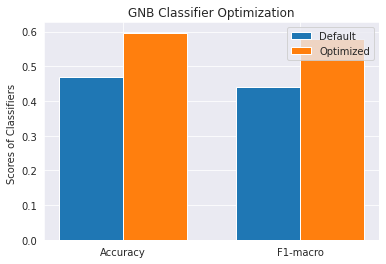

In [57]:
#visualize the results of Dummy optimization
gnb_optim_accur = standarORminmax(gnb_optim_accur_ss, gnb_optim_accur_ss_NoPCA,
                                  gnb_optim_accur_mm, gnb_optim_accur_mm_NoPCA,
                                  "GNB with accuracy")
gnb_optim_f1 = standarORminmax(gnb_optim_f1_ss, gnb_optim_f1_ss_NoPCA,
                               gnb_optim_f1_mm, gnb_optim_f1_mm_NoPCA,
                               "GNB with f1 macro")

plot_AccurANDf1([clfs4_10F_accuracy[1],clfs4_10F_f1macro[1]], [gnb_optim_accur,gnb_optim_f1], 
                ['Accuracy','F1-macro'],['Default','Optimized'] ,"GNB Classifier Optimization")

The best estimator for the Gaussian is Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=100)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('GNB',
                 GaussianNB(priors=array([0.27027027, 0.2347973 , 0.26013514, 0.2347973 ])))])


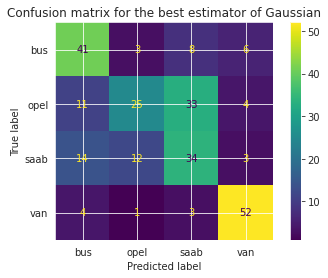

In [69]:
## plot the confusion matrix
## of the best version of GNB
best_GNB = PoiosEinaiObest([[Gaus_optim_accur_ss, gnb_optim_accur_ss],
                            [Gaus_optim_accur_mm, gnb_optim_accur_mm],
                            [Gaus_optim_f1_ss, gnb_optim_f1_ss],
                            [Gaus_optim_f1_mm, gnb_optim_f1_mm],
                            [Gaus_optim_accur_ss_NoPCA, gnb_optim_accur_ss_NoPCA],
                            [Gaus_optim_accur_mm_NoPCA, gnb_optim_accur_mm_NoPCA],
                            [Gaus_optim_f1_ss_NoPCA, gnb_optim_f1_ss_NoPCA],
                            [Gaus_optim_f1_mm_NoPCA, gnb_optim_f1_mm_NoPCA]])

print("The best estimator for the Gaussian is",best_GNB)

plot_confusion_matrix(best_GNB, X_test, y_test)
plt.title("Confusion matrix for the best estimator of Gaussian")
plt.show()

In [59]:
########################################
""" Logistic Regression Optimization """
########################################

pipe_lr_ss = Pipeline([('selector',selector),('scaler',standar),('pca',pca),('LR',LogisticRegression())],memory='tmp')
pipe_lr_mm = Pipeline([('selector',selector),('scaler',minmax),('pca',pca),('LR',LogisticRegression())],memory='tmp')

vthreshold_lr = [0,20,40,60,100] 
n_components_lr = [2,3,5,10]
params_lr = {'selector__threshold':vthreshold_lr,'pca__n_components':n_components_lr ,
              'LR__penalty':('l1', 'l2', 'elasticnet', 'none'),
              'LR__solver':('newton-cg','lbfgs','liblinear','sag','saga')}

LogReg_optim_accur_ss, lr_optim_accur_ss = Proc_Pipe_gsCV(pipe_lr_ss, params_lr,10,'accuracy')
print("The best score for Log Reg with optimization in accuracy is : "+str(lr_optim_accur_ss)+"\n")

LogReg_optim_accur_mm, lr_optim_accur_mm = Proc_Pipe_gsCV(pipe_lr_mm, params_lr,10,'accuracy')
print("The best score for Log Reg with optimization in accuracy is : "+str(lr_optim_accur_mm)+"\n")

LogReg_optim_f1_ss, lr_optim_f1_ss = Proc_Pipe_gsCV(pipe_lr_ss, params_lr,10,'f1_macro')
print("The best score for Log Reg with optimization in f1 macro is : "+str(lr_optim_f1_ss)+"\n")

LogReg_optim_f1_mm, lr_optim_f1_mm = Proc_Pipe_gsCV(pipe_lr_mm, params_lr,10,'f1_macro')
print("The best score for Log Reg with optimization in f1 macro is : "+str(lr_optim_f1_mm)+"\n")

The best parameters are  {'LR__penalty': 'l1', 'LR__solver': 'liblinear', 'pca__n_components': 10, 'selector__threshold': 0}
The best score for Log Reg with optimization in accuracy is : 0.7315819209039548

The best parameters are  {'LR__penalty': 'none', 'LR__solver': 'sag', 'pca__n_components': 10, 'selector__threshold': 40}
The best score for Log Reg with optimization in accuracy is : 0.7333333333333333

The best parameters are  {'LR__penalty': 'none', 'LR__solver': 'sag', 'pca__n_components': 10, 'selector__threshold': 40}
The best score for Log Reg with optimization in f1 macro is : 0.7238516081486914

The best parameters are  {'LR__penalty': 'none', 'LR__solver': 'sag', 'pca__n_components': 10, 'selector__threshold': 40}
The best score for Log Reg with optimization in f1 macro is : 0.7273891796062755



In [60]:
###########################
### Testing without PCA ###
###########################

pipe_lr_ss_NoPCA = Pipeline([('selector',selector),('scaler',standar),('LR',LogisticRegression())],memory='tmp')
pipe_lr_mm_NoPCA = Pipeline([('selector',selector),('scaler',minmax),('LR',LogisticRegression())],memory='tmp')

vthreshold_lr = [0,20,40,60,100] 
params_lr_NoPCA = {'selector__threshold':vthreshold_lr,
                   'LR__penalty':('l1', 'l2', 'elasticnet', 'none'),
                   'LR__solver':('newton-cg','lbfgs','liblinear','sag','saga')}

LogReg_optim_accur_ss_NoPCA, lr_optim_accur_ss_NoPCA= Proc_Pipe_gsCV(pipe_lr_ss_NoPCA, params_lr_NoPCA, 10, 'accuracy')
print("The best score for Log Reg with optimization in accuracy is : "+str(lr_optim_accur_ss_NoPCA)+"\n")

LogReg_optim_accur_mm_NoPCA, lr_optim_accur_mm_NoPCA = Proc_Pipe_gsCV(pipe_lr_mm_NoPCA, params_lr_NoPCA, 10, 'accuracy')
print("The best score for Log Reg with optimization in accuracy is : "+str(lr_optim_accur_mm_NoPCA)+"\n")

LogReg_optim_f1_ss_NoPCA, lr_optim_f1_ss_NoPCA = Proc_Pipe_gsCV(pipe_lr_ss_NoPCA, params_lr_NoPCA, 10, 'f1_macro')
print("The best score for Log Reg with optimization in f1 macro is : "+str(lr_optim_f1_ss_NoPCA)+"\n")

LogReg_optim_f1_mm_NoPCA, lr_optim_f1_mm_NoPCA = Proc_Pipe_gsCV(pipe_lr_mm_NoPCA, params_lr_NoPCA, 10, 'f1_macro')
print("The best score for Log Reg with optimization in f1 macro is : "+str(lr_optim_f1_mm_NoPCA)+"\n")

The best parameters are  {'LR__penalty': 'none', 'LR__solver': 'lbfgs', 'selector__threshold': 20}
The best score for Log Reg with optimization in accuracy is : 0.8025141242937852

The best parameters are  {'LR__penalty': 'none', 'LR__solver': 'sag', 'selector__threshold': 0}
The best score for Log Reg with optimization in accuracy is : 0.7805649717514124

The best parameters are  {'LR__penalty': 'none', 'LR__solver': 'lbfgs', 'selector__threshold': 20}
The best score for Log Reg with optimization in f1 macro is : 0.7979519641569386

The best parameters are  {'LR__penalty': 'none', 'LR__solver': 'newton-cg', 'selector__threshold': 0}
The best score for Log Reg with optimization in f1 macro is : 0.773912829614332



Standard > MinMax without PCA for Log Reg with accuracy
Standard > MinMax without PCA for Log Reg with f1 macro


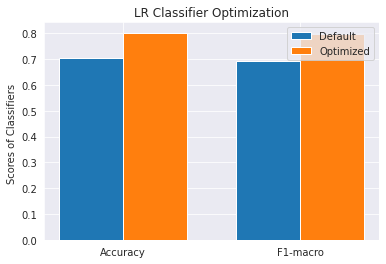

In [61]:
#visualize the results of Log Reg optimization
lr_optim_accur = standarORminmax(lr_optim_accur_ss, lr_optim_accur_ss_NoPCA,
                                 lr_optim_accur_mm,lr_optim_accur_mm_NoPCA,
                                 "Log Reg with accuracy")
lr_optim_f1 = standarORminmax(lr_optim_f1_ss, lr_optim_f1_ss_NoPCA,
                              lr_optim_f1_mm, lr_optim_f1_mm_NoPCA,
                              "Log Reg with f1 macro")

plot_AccurANDf1([clfs4_10F_accuracy[2],clfs4_10F_f1macro[2]], [lr_optim_accur,lr_optim_f1], 
                ['Accuracy','F1-macro'],['Default','Optimized'] ,"LR Classifier Optimization")

The best estimator for the Log Reg is Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=20)),
                ('scaler', StandardScaler()),
                ('LR', LogisticRegression(penalty='none'))])


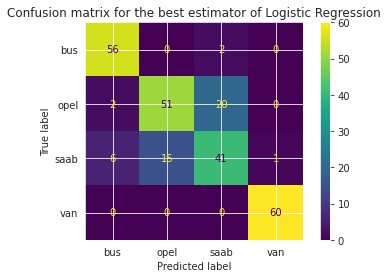

In [62]:
## plot the confusion matrix
## of the best version of Log Reg
best_LR = PoiosEinaiObest([[LogReg_optim_accur_ss, lr_optim_accur_ss],
                            [LogReg_optim_accur_mm, lr_optim_accur_mm],
                            [LogReg_optim_f1_ss, lr_optim_f1_ss],
                            [LogReg_optim_f1_mm, lr_optim_f1_mm],
                            [LogReg_optim_accur_ss_NoPCA, lr_optim_accur_ss_NoPCA],
                            [LogReg_optim_accur_mm_NoPCA, lr_optim_accur_mm_NoPCA],
                            [LogReg_optim_f1_ss_NoPCA, lr_optim_f1_ss_NoPCA ],
                            [LogReg_optim_f1_mm_NoPCA, lr_optim_f1_mm_NoPCA]])

print("The best estimator for the Log Reg is",best_LR)

plot_confusion_matrix(best_LR, X_test, y_test)
plt.title("Confusion matrix for the best estimator of Logistic Regression")
plt.show()

In [63]:
########################
""" KNN Optimization """
########################

pipe_knn_ss = Pipeline([('selector',selector),('scaler',standar),('pca',pca),('kNN',KNeighborsClassifier())],memory='tmp')
pipe_knn_mm = Pipeline([('selector',selector),('scaler',minmax),('pca',pca),('kNN',KNeighborsClassifier())],memory='tmp')

vthreshold_knn = [0,20,40,60,100] 
n_components_knn = [2,3,5]
params_knn={'selector__threshold':vthreshold_knn,'pca__n_components':n_components_knn,
            'kNN__n_neighbors':(1,3,5,11) , 'kNN__weights':('uniform','distance'),
            'kNN__algorithm':('ball_tree','kd_tree'),
            'kNN__metric':('euclidean','manhattan','chebyshev','minkowski')}

KNN_optim_accur_ss, knn_optim_accur_ss = Proc_Pipe_gsCV(pipe_knn_ss, params_knn, 10, 'accuracy')
print("The best score for KNN with optimization in accuracy is : "+str(knn_optim_accur_ss)+"\n")

KNN_optim_accur_mm, knn_optim_accur_mm = Proc_Pipe_gsCV(pipe_knn_mm, params_knn, 10, 'accuracy')
print("The best score for KNN with optimization in accuracy is : "+str(knn_optim_accur_mm)+"\n")

KNN_optim_f1_ss, knn_optim_f1_ss = Proc_Pipe_gsCV(pipe_knn_ss, params_knn , 10, 'f1_macro')
print("The best score for KNN with optimization in f1 macro is : "+str(knn_optim_f1_ss)+"\n")

KNN_optim_f1_mm, knn_optim_f1_mm = Proc_Pipe_gsCV(pipe_knn_mm, params_knn, 10, 'f1_macro')
print("The best score for KNN with optimization in f1 macro is : "+str(knn_optim_f1_mm)+"\n")


The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'euclidean', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance', 'pca__n_components': 5, 'selector__threshold': 100}
The best score for KNN with optimization in accuracy is : 0.6925423728813558

The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'euclidean', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance', 'pca__n_components': 5, 'selector__threshold': 100}
The best score for KNN with optimization in accuracy is : 0.7026553672316384

The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'euclidean', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance', 'pca__n_components': 5, 'selector__threshold': 100}
The best score for KNN with optimization in f1 macro is : 0.6837757111657818

The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'euclidean', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance', 'pca__n_components': 5, 'selector__threshold': 100}
The best score

In [64]:
pipe_knn_ss_NoPCA = Pipeline([('selector',selector),('scaler',standar),('kNN',KNeighborsClassifier())],memory='tmp')
pipe_knn_mm_NoPCA = Pipeline([('selector',selector),('scaler',minmax),('kNN',KNeighborsClassifier())],memory='tmp')

vthreshold_knn = [0,20,40,60,100] 
params_knn_NoPCA={'selector__threshold':vthreshold_knn,
                  'kNN__n_neighbors':(1,3,5,11) , 'kNN__weights':('uniform','distance'),
                  'kNN__algorithm':('ball_tree','kd_tree'),
                  'kNN__metric':('euclidean','manhattan','chebyshev','minkowski')}

KNN_optim_accur_ss_NoPCA, knn_optim_accur_ss_NoPCA = Proc_Pipe_gsCV(pipe_knn_ss_NoPCA, params_knn_NoPCA, 10, 'accuracy')
print("The best score for KNN with optimization in accuracy is : "+str(knn_optim_accur_ss_NoPCA)+"\n")

KNN_optim_accur_mm_NoPCA, knn_optim_accur_mm_NoPCA = Proc_Pipe_gsCV(pipe_knn_mm_NoPCA, params_knn_NoPCA, 10, 'accuracy')
print("The best score for KNN with optimization in accuracy is : "+str(knn_optim_accur_mm_NoPCA)+"\n")

KNN_optim_f1_ss_NoPCA, knn_optim_f1_ss_NoPCA = Proc_Pipe_gsCV(pipe_knn_ss_NoPCA, params_knn_NoPCA , 10, 'f1_macro')
print("The best score for KNN with optimization in f1 macro is : "+str(knn_optim_f1_ss_NoPCA)+"\n")

KNN_optim_f1_mm_NoPCA, knn_optim_f1_mm_NoPCA = Proc_Pipe_gsCV(pipe_knn_mm_NoPCA, params_knn_NoPCA, 10, 'f1_macro')
print("The best score for KNN with optimization in f1 macro is : "+str(knn_optim_f1_mm_NoPCA)+"\n")


The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'manhattan', 'kNN__n_neighbors': 3, 'kNN__weights': 'uniform', 'selector__threshold': 0}
The best score for KNN with optimization in accuracy is : 0.7197457627118643

The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'manhattan', 'kNN__n_neighbors': 5, 'kNN__weights': 'distance', 'selector__threshold': 0}
The best score for KNN with optimization in accuracy is : 0.7196610169491526

The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'manhattan', 'kNN__n_neighbors': 3, 'kNN__weights': 'uniform', 'selector__threshold': 0}
The best score for KNN with optimization in f1 macro is : 0.7026239063445273

The best parameters are  {'kNN__algorithm': 'ball_tree', 'kNN__metric': 'euclidean', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance', 'selector__threshold': 0}
The best score for KNN with optimization in f1 macro is : 0.6986346521656512



Standard > MinMax without PCA for KNN with accuracy
Standard > MinMax without PCA for KNN with f1 macro


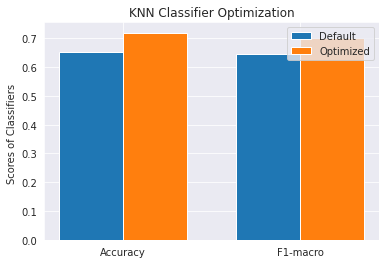

In [70]:
#visualize the results of Dummy optimization
knn_optim_accur = standarORminmax(knn_optim_accur_ss, knn_optim_accur_ss_NoPCA,
                                  knn_optim_accur_mm,knn_optim_accur_mm_NoPCA,
                                  "KNN with accuracy")
knn_optim_f1 = standarORminmax(knn_optim_f1_ss, knn_optim_f1_ss_NoPCA,
                               knn_optim_f1_mm,knn_optim_f1_mm_NoPCA,
                               "KNN with f1 macro")

plot_AccurANDf1([clfs4_10F_accuracy[3],clfs4_10F_f1macro[3]], [knn_optim_accur,knn_optim_f1], 
                ['Accuracy','F1-macro'],['Default','Optimized'] ,"ΚΝΝ Classifier Optimization")

The best estimator for the Log Reg is Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()),
                ('kNN',
                 KNeighborsClassifier(algorithm='ball_tree', metric='manhattan',
                                      n_neighbors=3))])


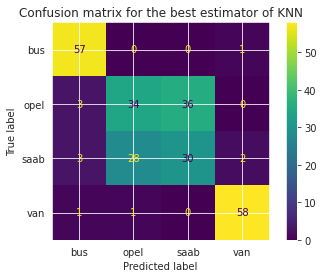

In [67]:
## plot the confusion matrix
## of the best version of Log Reg
best_KNN = PoiosEinaiObest([[KNN_optim_accur_ss, knn_optim_accur_ss],
                            [KNN_optim_accur_mm, knn_optim_accur_mm],
                            [KNN_optim_f1_ss, knn_optim_f1_ss],
                            [KNN_optim_f1_mm, knn_optim_f1_mm],
                            [KNN_optim_accur_ss_NoPCA, knn_optim_accur_ss_NoPCA],
                            [KNN_optim_accur_mm_NoPCA, knn_optim_accur_mm_NoPCA],
                            [KNN_optim_f1_ss_NoPCA, knn_optim_f1_ss_NoPCA],
                            [KNN_optim_f1_mm_NoPCA, knn_optim_f1_mm_NoPCA]])

print("The best estimator for the Log Reg is",best_KNN)

plot_confusion_matrix(best_KNN, X_test, y_test)
plt.title("Confusion matrix for the best estimator of KNN")
plt.show()

In [68]:
##################################
""" combaring the optimization """
##################################

#Let's add all the best scores in a list
optim_10f_accur = [dc_optim_accur, gnb_optim_accur , lr_optim_accur, knn_optim_accur ]
optim_10f_f1 = [dc_optim_f1, gnb_optim_f1, lr_optim_f1, knn_optim_f1 ]

titlos_mark1 = 'The accuracies for the classifiers ' 
epikefalides_mark1 = ['Classifiers', 'Dummy', 'Gaussian NB', 'Logistic Regresion', 'KNN']
dedomena_mark2 = [('Simple Accuracy', str(clfs4_simple_scores[0]), str(clfs4_simple_scores[1]), str(clfs4_simple_scores[2]),str(clfs4_simple_scores[3])),
                  ('Accuracy 10 fcv', str(clfs4_10F_accuracy[0]), str(clfs4_10F_accuracy[1]), str(clfs4_10F_accuracy[2]), str(clfs4_10F_accuracy[3])),
                  ('f1 macro 10 fcv', str(clfs4_10F_f1macro[0]), str(clfs4_10F_f1macro[1]), str(clfs4_10F_f1macro[2]), str(clfs4_10F_f1macro[3])),
                  ('Optimized Accuracy 10 fcv', str(optim_10f_accur[0]), str(optim_10f_accur[1]), str(optim_10f_accur[2]), str(optim_10f_accur[3])),
                  ('Optimized f1 macro 10 fcv', str(optim_10f_f1[0]), str(optim_10f_f1[1]), str(optim_10f_f1[2]), str(optim_10f_f1[3]))]

markdownCreator(titlos_mark1, epikefalides_mark1, dedomena_mark2)

The accuracies for the classifiers 

|        Classifiers        |        Dummy        |     Gaussian NB     | Logistic Regresion |        KNN         |
| :------------------------ | :-----------------: | :------------------ | :----------------: | -----------------: |
| Simple Accuracy           | 0.2283464566929134  | 0.44881889763779526 | 0.7086614173228346 | 0.6456692913385826 |
| Accuracy 10 fcv           |  0.217436974789916  | 0.4704341736694678  | 0.7043837535014005 | 0.6525210084033614 |
| f1 macro 10 fcv           | 0.08879868838754923 | 0.4413071991576848  | 0.6946675267581724 | 0.6464304560744696 |
| Optimized Accuracy 10 fcv | 0.3023446327683616  | 0.5966666666666667  | 0.8025141242937852 | 0.7197457627118643 |
| Optimized f1 macro 10 fcv | 0.3061971228501524  | 0.5791508128850442  | 0.7979519641569386 | 0.7026239063445273 |
